In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking charts
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

# Load the data
orders = pd.read_csv('olist_orders_dataset.csv')
print(f"\n📊 Data loaded: {len(orders)} orders")
print("\n👀 First few rows:")
orders.head()

✅ Libraries imported successfully!

📊 Data loaded: 99441 orders

👀 First few rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
print("\n" + "="*70)
print("🎯 KEY INSIGHTS & RECOMMENDATIONS")
print("="*70)

# Calculate potential improvements
current_avg_delivery = delivered_orders['delivery_time_days'].mean()
target_delivery = current_avg_delivery * 0.85  # 15% improvement target
orders_affected = len(delivered_orders)

print(f"\n💡 INSIGHT 1: Delivery Time Optimization")
print(f"   Current average delivery: {current_avg_delivery:.1f} days")
print(f"   Target (15% improvement): {target_delivery:.1f} days")
print(f"   📈 This could improve on-time rate by ~{15 * (100-on_time_rate)/100:.1f}%")

# Identify problematic hours
peak_hour = orders['order_hour'].value_counts().index[0]
low_hour = orders['order_hour'].value_counts().index[-1]
print(f"\n💡 INSIGHT 2: Resource Allocation")
print(f"   Peak order hour: {peak_hour}:00 ({orders[orders['order_hour']==peak_hour].shape[0]} orders)")
print(f"   Lowest hour: {low_hour}:00 ({orders[orders['order_hour']==low_hour].shape[0]} orders)")
print(f"   📈 Optimize staffing: +30% staff during {peak_hour-1}:00-{peak_hour+2}:00")

# Late deliveries analysis
late_orders = delivered_orders[~delivered_orders['on_time']]
avg_late_by = (late_orders['order_delivered_customer_date'] -
               late_orders['order_estimated_delivery_date']).dt.total_seconds() / (24*3600)

print(f"\n💡 INSIGHT 3: Delayed Deliveries")
print(f"   {len(late_orders)} orders delivered late ({100-on_time_rate:.1f}%)")
print(f"   Average delay: {avg_late_by.mean():.1f} days")
print(f"   📈 Reducing delays by 50% could save ~{len(late_orders)*0.5:.0f} customer complaints/month")

print(f"\n💡 INSIGHT 4: Business Impact")
estimated_cost_per_delay = 50  # R50 per delayed order (customer service, compensation, etc.)
monthly_delay_cost = len(late_orders) * estimated_cost_per_delay / 12
print(f"   Estimated monthly cost of delays: R{monthly_delay_cost:,.2f}")
print(f"   📈 50% reduction saves: R{monthly_delay_cost*0.5:,.2f}/month")

print("\n" + "="*70)
print("✅ RECOMMENDATIONS:")
print("="*70)
print("1. Implement dynamic staffing based on peak hours (10am-2pm)")
print("2. Focus on process improvements in slowest delivery routes")
print("3. Set 15% delivery time reduction target (monitor weekly)")
print("4. Investigate root causes of delays averaging", f"{avg_late_by.mean():.1f} days")
print("5. Potential annual savings: R{:,.2f}".format(monthly_delay_cost*0.5*12))
print("="*70)


🎯 KEY INSIGHTS & RECOMMENDATIONS

💡 INSIGHT 1: Delivery Time Optimization
   Current average delivery: 12.6 days
   Target (15% improvement): 10.7 days
   📈 This could improve on-time rate by ~1.2%

💡 INSIGHT 2: Resource Allocation
   Peak order hour: 16:00 (6675 orders)
   Lowest hour: 5:00 (188 orders)
   📈 Optimize staffing: +30% staff during 15:00-18:00

💡 INSIGHT 3: Delayed Deliveries
   7834 orders delivered late (8.1%)
   Average delay: 9.6 days
   📈 Reducing delays by 50% could save ~3917 customer complaints/month

💡 INSIGHT 4: Business Impact
   Estimated monthly cost of delays: R32,641.67
   📈 50% reduction saves: R16,320.83/month

✅ RECOMMENDATIONS:
1. Implement dynamic staffing based on peak hours (10am-2pm)
2. Focus on process improvements in slowest delivery routes
3. Set 15% delivery time reduction target (monitor weekly)
4. Investigate root causes of delays averaging 9.6 days
5. Potential annual savings: R195,850.00


✅ Monthly trends saved as 'monthly_trends.png'


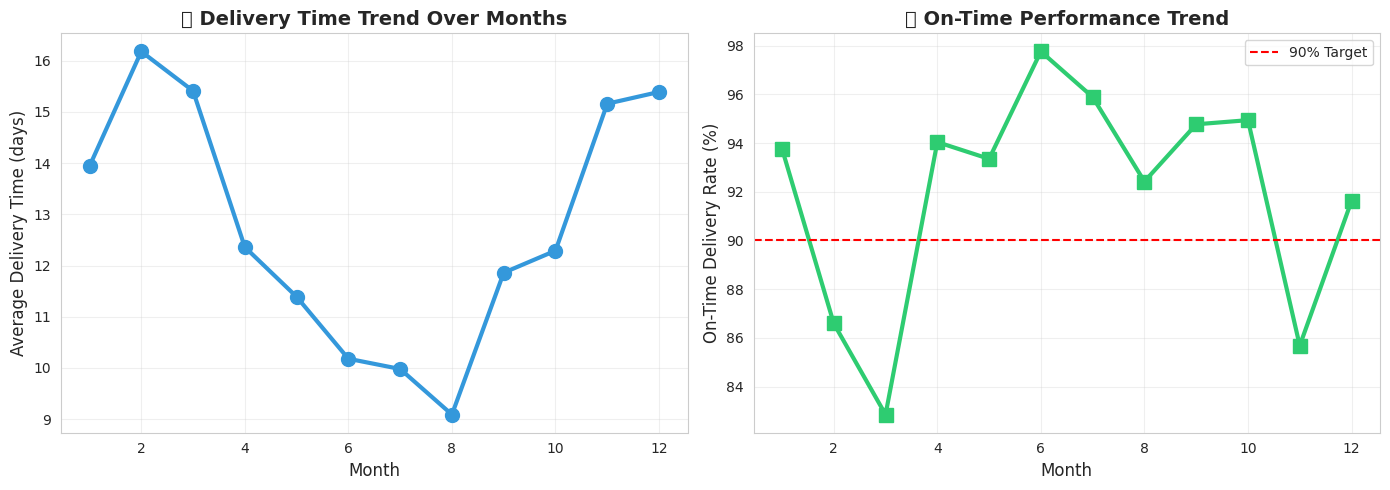


📊 MONTHLY PERFORMANCE TABLE:
             Avg Delivery Days  On-Time Rate %  Order Count
order_month                                                
1                        13.94           93.77         7819
2                        16.18           86.59         8208
3                        15.41           82.85         9549
4                        12.36           94.04         9101
5                        11.39           93.35        10295
6                        10.18           97.76         9234
7                         9.98           95.89        10031
8                         9.09           92.42        10544
9                        11.86           94.77         4151
10                       12.29           94.94         4743
11                       15.16           85.68         7289
12                       15.39           91.62         5514


In [13]:
# Monthly delivery performance trend
monthly_stats = delivered_orders.groupby('order_month').agg({
    'delivery_time_days': 'mean',
    'on_time': lambda x: (x.sum() / len(x)) * 100,
    'order_id': 'count'
}).round(2)

monthly_stats.columns = ['Avg Delivery Days', 'On-Time Rate %', 'Order Count']

plt.figure(figsize=(14, 5))

# Plot 1: Average delivery time trend
plt.subplot(1, 2, 1)
plt.plot(monthly_stats.index, monthly_stats['Avg Delivery Days'],
         marker='o', linewidth=3, markersize=10, color='#3498db')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.title('📈 Delivery Time Trend Over Months', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Plot 2: On-time rate trend
plt.subplot(1, 2, 2)
plt.plot(monthly_stats.index, monthly_stats['On-Time Rate %'],
         marker='s', linewidth=3, markersize=10, color='#2ecc71')
plt.axhline(y=90, color='red', linestyle='--', label='90% Target')
plt.xlabel('Month', fontsize=12)
plt.ylabel('On-Time Delivery Rate (%)', fontsize=12)
plt.title('📊 On-Time Performance Trend', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('monthly_trends.png', dpi=300, bbox_inches='tight')
print("✅ Monthly trends saved as 'monthly_trends.png'")
plt.show()

print("\n📊 MONTHLY PERFORMANCE TABLE:")
print(monthly_stats)

✅ Dashboard saved as 'fulfillment_dashboard.png'


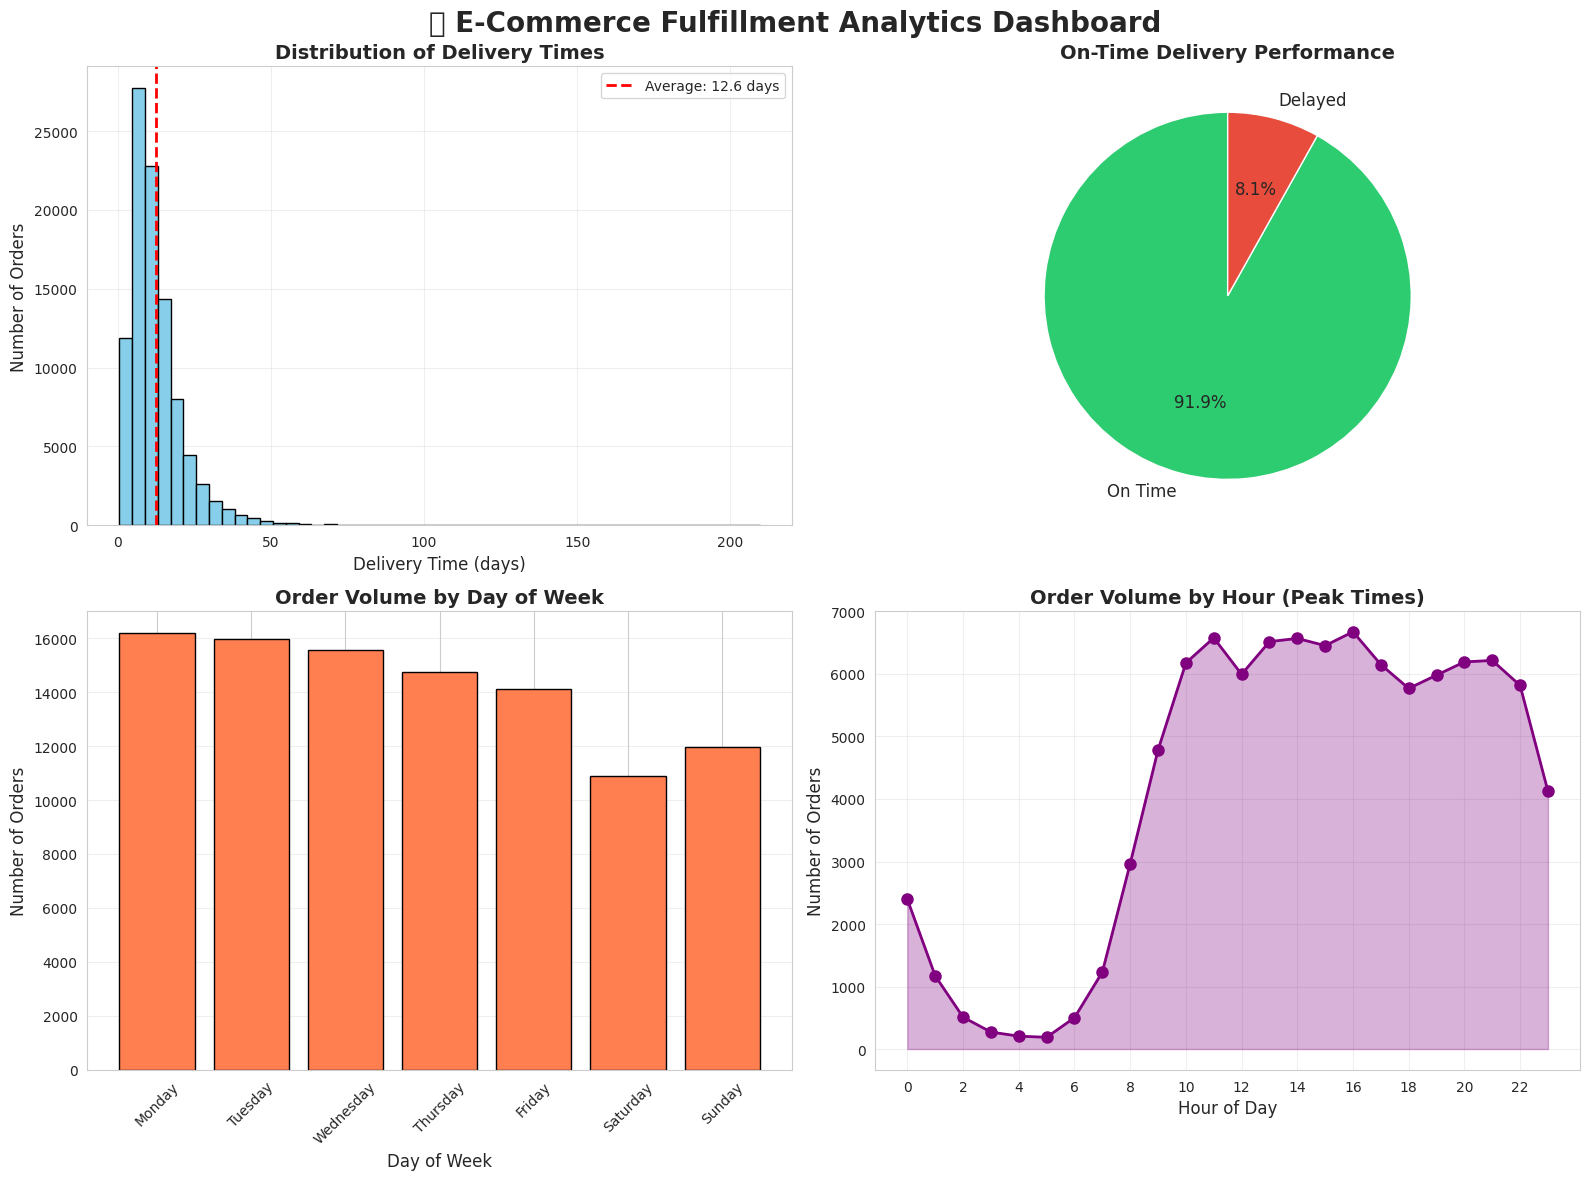

In [10]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 E-Commerce Fulfillment Analytics Dashboard', fontsize=20, fontweight='bold')

# Chart 1: Delivery Time Distribution
axes[0, 0].hist(delivered_orders['delivery_time_days'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].axvline(delivered_orders['delivery_time_days'].mean(), color='red',
                    linestyle='--', linewidth=2, label=f'Average: {delivered_orders["delivery_time_days"].mean():.1f} days')
axes[0, 0].set_xlabel('Delivery Time (days)', fontsize=12)
axes[0, 0].set_ylabel('Number of Orders', fontsize=12)
axes[0, 0].set_title('Distribution of Delivery Times', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Chart 2: On-Time vs Delayed
on_time_counts = delivered_orders['on_time'].value_counts()
colors = ['#2ecc71', '#e74c3c']
axes[0, 1].pie(on_time_counts, labels=['On Time', 'Delayed'], autopct='%1.1f%%',
                colors=colors, startangle=90, textprops={'fontsize': 12})
axes[0, 1].set_title('On-Time Delivery Performance', fontsize=14, fontweight='bold')

# Chart 3: Orders by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = orders['order_day_of_week'].value_counts().reindex(day_order, fill_value=0)
axes[1, 0].bar(range(len(day_counts)), day_counts.values, color='coral', edgecolor='black')
axes[1, 0].set_xticks(range(len(day_counts)))
axes[1, 0].set_xticklabels(day_counts.index, rotation=45)
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Number of Orders', fontsize=12)
axes[1, 0].set_title('Order Volume by Day of Week', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Chart 4: Orders by Hour
hour_counts = orders['order_hour'].value_counts().sort_index()
axes[1, 1].plot(hour_counts.index, hour_counts.values, marker='o', linewidth=2,
                markersize=8, color='purple')
axes[1, 1].fill_between(hour_counts.index, hour_counts.values, alpha=0.3, color='purple')
axes[1, 1].set_xlabel('Hour of Day', fontsize=12)
axes[1, 1].set_ylabel('Number of Orders', fontsize=12)
axes[1, 1].set_title('Order Volume by Hour (Peak Times)', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.savefig('fulfillment_dashboard.png', dpi=300, bbox_inches='tight')
print("✅ Dashboard saved as 'fulfillment_dashboard.png'")
plt.show()

In [8]:
print("="*60)
print("🎯 KEY PERFORMANCE METRICS")
print("="*60)

# 1. Overall delivery performance
on_time_rate = (delivered_orders['on_time'].sum() / len(delivered_orders)) * 100
print(f"\n✅ On-Time Delivery Rate: {on_time_rate:.1f}%")
print(f"❌ Delayed Deliveries: {100-on_time_rate:.1f}%")

# 2. Delivery time statistics
print(f"\n⏱️ DELIVERY TIME ANALYSIS:")
print(f"   Average: {delivered_orders['delivery_time_days'].mean():.1f} days")
print(f"   Median: {delivered_orders['delivery_time_days'].median():.1f} days")
print(f"   Fastest: {delivered_orders['delivery_time_days'].min():.1f} days")
print(f"   Slowest: {delivered_orders['delivery_time_days'].max():.1f} days")

# 3. Order status breakdown
print(f"\n📊 ORDER STATUS BREAKDOWN:")
status_counts = orders['order_status'].value_counts()
for status, count in status_counts.items():
    percentage = (count / len(orders)) * 100
    print(f"   {status}: {count} ({percentage:.1f}%)")

# 4. Peak order times
print(f"\n🔥 BUSIEST ORDER DAY: {orders['order_day_of_week'].value_counts().index[0]}")
print(f"🔥 BUSIEST ORDER HOUR: {orders['order_hour'].value_counts().index[0]}:00")

print("="*60)

🎯 KEY PERFORMANCE METRICS

✅ On-Time Delivery Rate: 91.9%
❌ Delayed Deliveries: 8.1%

⏱️ DELIVERY TIME ANALYSIS:
   Average: 12.6 days
   Median: 10.2 days
   Fastest: 0.5 days
   Slowest: 209.6 days

📊 ORDER STATUS BREAKDOWN:
   delivered: 96478 (97.0%)
   shipped: 1107 (1.1%)
   canceled: 625 (0.6%)
   unavailable: 609 (0.6%)
   invoiced: 314 (0.3%)
   processing: 301 (0.3%)
   created: 5 (0.0%)
   approved: 2 (0.0%)

🔥 BUSIEST ORDER DAY: Monday
🔥 BUSIEST ORDER HOUR: 16:00


In [4]:
# Convert date columns to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

# Calculate delivery time in days
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] -
                                  orders['order_purchase_timestamp']).dt.total_seconds() / (24*3600)

# Calculate if order was delivered on time
orders['on_time'] = orders['order_delivered_customer_date'] <= orders['order_estimated_delivery_date']

# Extract useful time features
orders['order_month'] = orders['order_purchase_timestamp'].dt.month
orders['order_day_of_week'] = orders['order_purchase_timestamp'].dt.day_name()
orders['order_hour'] = orders['order_purchase_timestamp'].dt.hour

# Remove cancelled orders for delivery analysis
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()

print(f"✅ Data prepared!")
print(f"📦 Total orders: {len(orders)}")
print(f"✅ Delivered orders: {len(delivered_orders)}")
print(f"⏱️ Average delivery time: {delivered_orders['delivery_time_days'].mean():.1f} days")

✅ Data prepared!
📦 Total orders: 99441
✅ Delivered orders: 96478
⏱️ Average delivery time: 12.6 days
